In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.layers as layers
from keras.layers import Dense, Conv2D, Activation, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from keras.callbacks import ReduceLROnPlateau
import math

In [2]:
train, test = tf.keras.datasets.fashion_mnist.load_data()

images, labels = train

images = images/255.0

labels = labels.astype(np.int32)

X_train, X_val, y_train, y_val = \
    train_test_split(images, labels, test_size=0.1, random_state=4321, stratify=labels)

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))

train_ds = train_ds.batch(150)

f_mnist_model = tf.keras.Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(28, 28 ,1)),
    MaxPooling2D(),
    Dropout(0.3),
    BatchNormalization(), 
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.5),
    layers.Flatten(),
    BatchNormalization(),
    layers.Dense(350,activation='relu'),
    layers.Dense(150, activation='relu'),
    Dropout(0.25),
    layers.Dense(10, activation='softmax')
])

f_mnist_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.4,
                              patience=3, min_lr=0.00000001)

train_stats = f_mnist_model.fit(train_ds, epochs=55, callbacks=[reduce_lr],validation_data=(X_val, y_val))


Epoch 1/55
360/360 [==============================] - 18s 47ms/step - loss: 0.6845 - accuracy: 0.7434 - val_loss: 0.7535 - val_accuracy: 0.6877 - lr: 0.0010
Epoch 2/55
360/360 [==============================] - 17s 46ms/step - loss: 0.4499 - accuracy: 0.8329 - val_loss: 0.3227 - val_accuracy: 0.8808 - lr: 0.0010
Epoch 3/55
360/360 [==============================] - 18s 49ms/step - loss: 0.3966 - accuracy: 0.8521 - val_loss: 0.2972 - val_accuracy: 0.8890 - lr: 0.0010
Epoch 4/55
360/360 [==============================] - 18s 51ms/step - loss: 0.3695 - accuracy: 0.8638 - val_loss: 0.2773 - val_accuracy: 0.8993 - lr: 0.0010
Epoch 5/55
360/360 [==============================] - 19s 53ms/step - loss: 0.3545 - accuracy: 0.8690 - val_loss: 0.2703 - val_accuracy: 0.8973 - lr: 0.0010
Epoch 6/55
360/360 [==============================] - 22s 62ms/step - loss: 0.3327 - accuracy: 0.8757 - val_loss: 0.2547 - val_accuracy: 0.9057 - lr: 0.0010
Epoch 7/55
360/360 [==============================] - 18s 

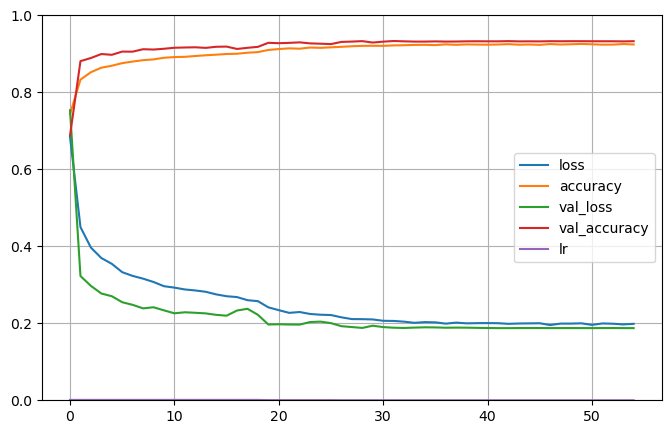

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(train_stats.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [4]:
y_pred = f_mnist_model.predict(X_val)
print("probs : ", y_pred[2])
print("klasa :", np.argmax(y_pred[2]))
print("rzeczywista klasa: ", y_val[2])

188/188 [==============================] - 1s 6ms/step
probs :  [9.9988693e-01 1.3304594e-14 1.0729634e-06 1.3016379e-08 1.6534916e-11
 9.7000763e-16 1.1190355e-04 4.5032665e-17 7.7039842e-12 9.7238185e-17]
klasa : 0
rzeczywista klasa:  0


In [5]:
score = f_mnist_model.evaluate(X_val, y_val)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

188/188 [==============================] - 1s 5ms/step - loss: 0.1874 - accuracy: 0.9327
Test loss: 0.18740281462669373
Test accuracy: 0.9326666593551636


In [7]:
f_mnist_model.save('model_18.3a.h5')